In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [31]:
# from google.colab import files
# uploaded = files.upload()


In [24]:
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
# Basic information about the dataset
print(df.info())

# Statistical summary of numerical columns
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

# Checking class distribution
print(df['Class'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [26]:
# Remove rows with NaN in the 'Class' column
df = df.dropna(subset=['Class'])

# Separate features and target after removing NaN
X = df.drop('Class', axis=1)
y = df['Class']

split of data


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Normaizing features

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

training step

In [34]:
# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
model.fit(X_train, y_train)



RandomForestClassifier(n_estimators=10, random_state=42)

In [35]:
y_pred = model.predict(X_test)


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.80      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56859     5]
 [   20    78]]
Accuracy Score: 0.9995611109160493


In [37]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display features and their importance
import pandas as pd

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
   Feature  Importance
14     V14    0.261788
17     V17    0.170316
10     V10    0.102715
12     V12    0.080669
16     V16    0.053987
4       V4    0.025080
2       V2    0.024582
21     V21    0.024120
7       V7    0.020737
29  Amount    0.017824
20     V20    0.017633
27     V27    0.016769
11     V11    0.016582
26     V26    0.015710
9       V9    0.015386
15     V15    0.013736
8       V8    0.011869
3       V3    0.011350
0     Time    0.011107
1       V1    0.010018
13     V13    0.009411
6       V6    0.009110
19     V19    0.008619
23     V23    0.008379
5       V5    0.007586
28     V28    0.007557
24     V24    0.007441
18     V18    0.007190
25     V25    0.006870
22     V22    0.005859


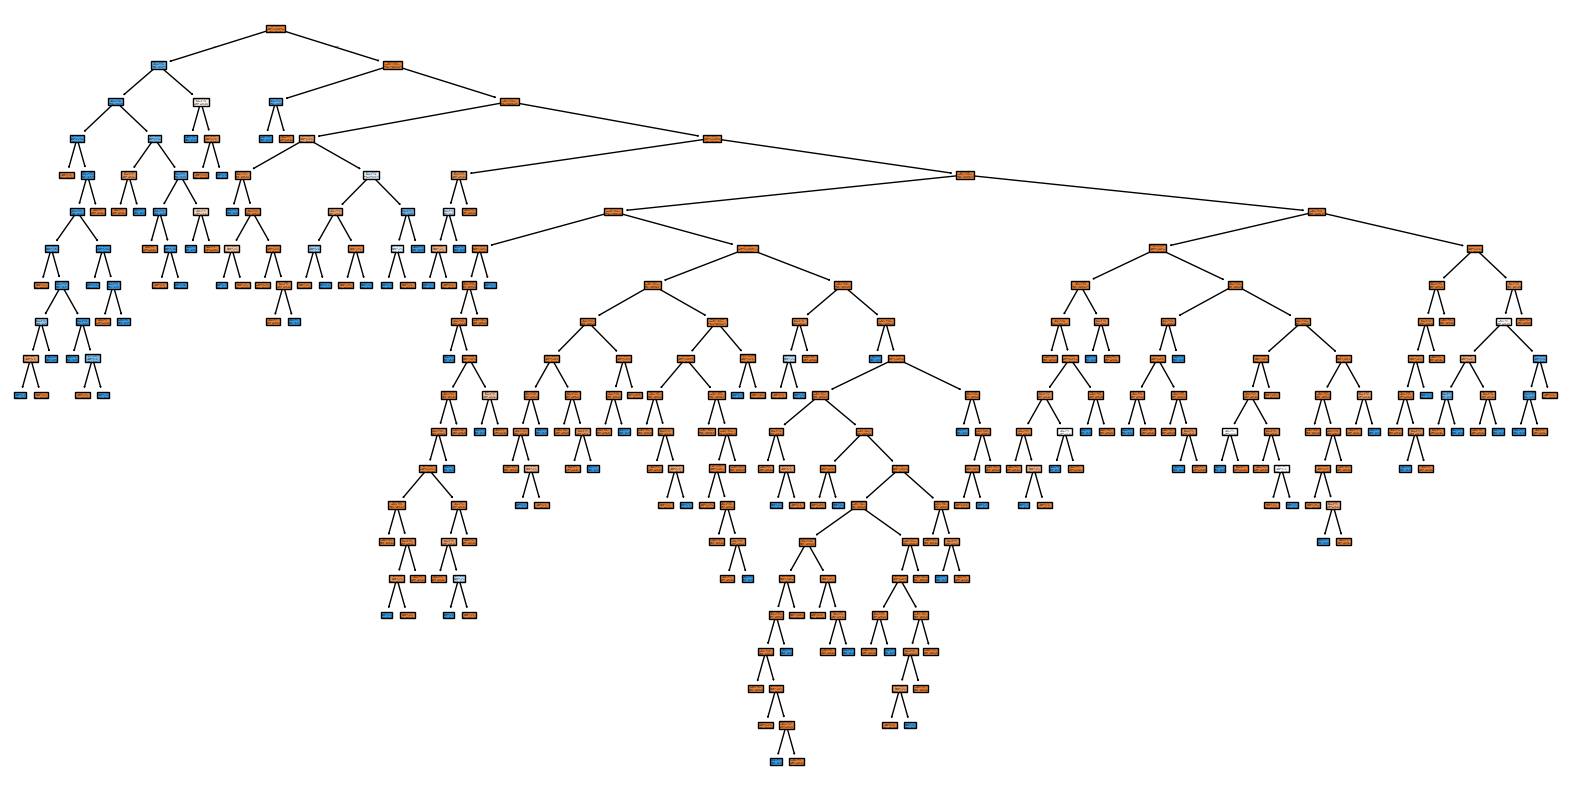

In [38]:
from sklearn.tree import plot_tree

# Plot one of the trees in the random forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=['Non-Fraud', 'Fraud'])
plt.show()
